In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from spreg import ML_Lag
from libpysal import weights
pd.set_option('display.float_format', lambda x: '%.10f' % x)

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
c:\Users\84398\AppD

In [49]:
df = pd.read_csv(r"D:\POI data\728_7acc\housing_hasId_reclass1_acc.csv")

df_encoded = pd.get_dummies(df, columns=['property_type','tenure'])

coords = df_encoded[['lon', 'lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','borough'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :     -0.0000                Number of Variables   :          51
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3686
Pseudo R-squared    :      0.6757
Spatial Pseudo R-squared:  0.5508
Sigma-square ML     :       0.326                Log likelihood        :   -3358.565
S.E of regression   :       0.571                Akaike info criterion :    6819.131
                                                 Schwarz criterion     :    7136.658

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:352: RuntimeWarning: invalid value encountered in sqrt
  se_result = np.sqrt(variance)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:167: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(variance)


'bedrooms',
 'bathrooms',
 'size_square_meters',
 'garden',
 'AccommodationAccess15m',
 'AirportsAccess15m',
 'Public transportAccess15m',
 'Eating and drinkingAccess15m',
 'ShoppingAccess15m',
 'Commercial servicesAccess15m',
 'EducationAccess15m',
 'HealthAccess15m',
 'Manufacturing and productionAccess15m',
 'Bodies of waterAccess15m',
 'CultureAccess15m',
 'EntertainmentAccess15m',
 'Green parkAccess15m',
 'Public infrastructureAccess15m',
 'SportsAccess15m',
 'TourismAccess15m',
 'tenure_Leasehold',
 'tenure_Share of Freehold',
 'tenure_Unknown'

In [50]:
variable_list = ['CONSTANT', 'bedrooms',
 'bathrooms',
 'size_square_meters',
 'garden',
 'AccommodationAccess15m',
 'AirportsAccess15m',
 'Public transportAccess15m',
 'Eating and drinkingAccess15m',
 'ShoppingAccess15m',
 'Commercial servicesAccess15m',
 'EducationAccess15m',
 'HealthAccess15m',
 'Manufacturing and productionAccess15m',
 'Bodies of waterAccess15m',
 'CultureAccess15m',
 'EntertainmentAccess15m',
 'Green parkAccess15m',
 'Public infrastructureAccess15m',
 'SportsAccess15m',
 'TourismAccess15m',
 'tenure_Leasehold',
 'tenure_Share of Freehold',
 'tenure_Unknown']

coefficient_list = [-0.0020673, -0.0817205, 0.1433776, 0.0390474, 0.0162423, 0.0315235, 0.0003917, -0.1061388,
                    -0.0866620, 0.2032396, 0.0588542, 0.0478948, -0.0235725, -0.0715237, -0.0209648, 0.0617715,
                    -0.2612496, 0.0141059, -0.0138452, 0.0900253, 0.2087035,0.0316198 ,0.0382138,0.0447590]

std_error_list = [0.0093420, 0.0180927, 0.0154540, 0.0155574, 0.0125014, 0.0172323, 0.0095852, 0.0332249,
                  0.0606551, 0.0288608, 0.0644778, 0.0429939, 0.0214703, 0.0359815, 0.0106387, 0.0257885,
                  0.0408464, 0.0144174, 0.0631080, 0.0234749, 0.0343728,0.0206431,0.0152786,0.0104045]

z_statistic_list = [-0.2212934, -4.5167746, 9.2776920, 2.5098974, 1.2992394, 1.8293219, 0.0408632, -3.1945502,
                    -1.4287676, 7.0420627, 0.9127829, 1.1139906, -1.0979096, -1.9877915, -1.9706150, 2.3953085,
                    -6.3959084, 0.9783904, -0.2193889, 3.8349579, 6.0717625,1.5317327,2.5011336,4.3018989]

probability_list = [0.8248640, 0.0000063, 0.0000000, 0.0120766, 0.1938618, 0.0673514, 0.9674050, 0.0014005,
                    0.1530710, 0.0000000, 0.3613567, 0.2652832, 0.2722440, 0.0468348, 0.0487679, 0.0166064,
                    0.0000000, 0.3278813, 0.8263471, 0.0001256, 0.0000000,0.1255884,0.0123796,0.0000169]

data = {
    'Variable': variable_list,
    'Coefficient': coefficient_list,
    'Std.Error': std_error_list,
    'z-Statistic': z_statistic_list,
    'Probability': probability_list
}

summary_df = pd.DataFrame(data)
summary_df


,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,CONSTANT,-0.0020673000,0.0093420000,-0.2212934000,0.8248640000
1,bedrooms,-0.0817205000,0.0180927000,-4.5167746000,0.0000063000
2,bathrooms,0.1433776000,0.0154540000,9.2776920000,0.0000000000
3,size_square_meters,0.0390474000,0.0155574000,2.5098974000,0.0120766000
4,garden,0.0162423000,0.0125014000,1.2992394000,0.1938618000
5,AccommodationAccess15m,0.0315235000,0.0172323000,1.8293219000,0.0673514000
6,AirportsAccess15m,0.0003917000,0.0095852000,0.0408632000,0.9674050000
7,Public transportAccess15m,-0.1061388000,0.0332249000,-3.1945502000,0.0014005000
8,Eating and drinkingAccess15m,-0.0866620000,0.0606551000,-1.4287676000,0.1530710000
9,ShoppingAccess15m,0.2032396000,0.0288608000,7.0420627000,0.0000000000


In [51]:
df_sig = summary_df[summary_df['Probability'] < 0.05]
df_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
1,bedrooms,-0.0817205000,0.0180927000,-4.5167746000,0.0000063000
2,bathrooms,0.1433776000,0.0154540000,9.2776920000,0.0000000000
3,size_square_meters,0.0390474000,0.0155574000,2.5098974000,0.0120766000
7,Public transportAccess15m,-0.1061388000,0.0332249000,-3.1945502000,0.0014005000
9,ShoppingAccess15m,0.2032396000,0.0288608000,7.0420627000,0.0000000000
13,Manufacturing and productionAccess15m,-0.0715237000,0.0359815000,-1.9877915000,0.0468348000
14,Bodies of waterAccess15m,-0.0209648000,0.0106387000,-1.9706150000,0.0487679000
15,CultureAccess15m,0.0617715000,0.0257885000,2.3953085000,0.0166064000
16,EntertainmentAccess15m,-0.2612496000,0.0408464000,-6.3959084000,0.0000000000
19,SportsAccess15m,0.0900253000,0.0234749000,3.8349579000,0.0001256000


In [52]:
df_not_sig = summary_df[summary_df['Probability'] >= 0.05]
df_not_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,CONSTANT,-0.0020673000,0.0093420000,-0.2212934000,0.8248640000
4,garden,0.0162423000,0.0125014000,1.2992394000,0.1938618000
5,AccommodationAccess15m,0.0315235000,0.0172323000,1.8293219000,0.0673514000
6,AirportsAccess15m,0.0003917000,0.0095852000,0.0408632000,0.9674050000
8,Eating and drinkingAccess15m,-0.0866620000,0.0606551000,-1.4287676000,0.1530710000
10,Commercial servicesAccess15m,0.0588542000,0.0644778000,0.9127829000,0.3613567000
11,EducationAccess15m,0.0478948000,0.0429939000,1.1139906000,0.2652832000
12,HealthAccess15m,-0.0235725000,0.0214703000,-1.0979096000,0.2722440000
17,Green parkAccess15m,0.0141059000,0.0144174000,0.9783904000,0.3278813000
18,Public infrastructureAccess15m,-0.0138452000,0.0631080000,-0.2193889000,0.8263471000


---


测试reclass2

In [53]:
df = pd.read_csv(r"D:\POI data\728_7acc\housing_hasId_reclass2_acc.csv")

df_encoded = pd.get_dummies(df, columns=['property_type','tenure'])

coords = df_encoded[['lon', 'lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','borough'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :     -0.0000                Number of Variables   :          52
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3685
Pseudo R-squared    :      0.6748
Spatial Pseudo R-squared:  0.5446
Sigma-square ML     :       0.327                Log likelihood        :   -3366.176
S.E of regression   :       0.572                Akaike info criterion :    6836.353
                                                 Schwarz criterion     :    7160.107

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:352: RuntimeWarning: invalid value encountered in sqrt
  se_result = np.sqrt(variance)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:167: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(variance)


In [55]:
variable_list = ['CONSTANT', 'bedrooms',
 'bathrooms',
 'size_square_meters',
 'garden',
 'AccommodationAccess15m',
 'AirportsAccess15m',
 'Public transportAccess15m',
 'Eating and drinkingAccess15m',
 'ShoppingAccess15m',
 'Commercial servicesAccess15m',
 'EducationAccess15m',
 'HealthAccess15m',
 'Manufacturing and productionAccess15m',
 'Bodies of waterAccess15m',
 'CultureAccess15m',
 'EntertainmentAccess15m',
 'GamblingAccess15m',
 'Green parkAccess15m',
 'Public infrastructureAccess15m',
 'SportsAccess15m',
 'TourismAccess15m',]


coefficient_list = [-0.0020681, -0.0804547, 0.1432735, 0.0388846, 0.0255909, 0.0359687, -0.0017325, -0.0834263,
                    -0.0167273, 0.2045048, 0.0535631, 0.0431793, -0.0166360, -0.0811757, -0.0199119, 0.0549224,
                    -0.2244559, -0.1024000, 0.0139891, -0.0170868, 0.0830296, 0.1879913]

std_error_list = [0.0093605, 0.0181357, 0.0154676, 0.0155868, 0.0123442, 0.0173912, 0.0096321, 0.0346137,
                  0.0658406, 0.0290355, 0.0646795, 0.0431085, 0.0215163, 0.0362506, 0.0106648, 0.0260651,
                  0.0355430, 0.0246890, 0.0144474, 0.0632034, 0.0236871, 0.0349479]

z_statistic_list = [-0.2209365, -4.4362722, 9.2628024, 2.4947199, 2.0731179, 2.0682066, -0.1798654, -2.4102099,
                    -0.2540572, 7.0432706, 0.8281308, 1.0016430, -0.7731814, -2.2392891, -1.8670573, 2.1071234,
                    -6.3150470, -4.1475889, 0.9682739, -0.2703457, 3.5052619, 5.3791907]

probability_list = [0.8251419, 0.0000092, 0.0000000, 0.0126057, 0.0381613, 0.0386206, 0.8572582, 0.0159433,
                    0.7994514, 0.0000000, 0.4075964, 0.3165161, 0.4394150, 0.0251371, 0.0618936, 0.0351069,
                    0.0000000, 0.0000336, 0.3329076, 0.7868943, 0.0004562, 0.0000001]


data = {
    'Variable': variable_list,
    'Coefficient': coefficient_list,
    'Std.Error': std_error_list,
    'z-Statistic': z_statistic_list,
    'Probability': probability_list
}

summary_df = pd.DataFrame(data)
summary_df

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,CONSTANT,-0.0020681000,0.0093605000,-0.2209365000,0.8251419000
1,bedrooms,-0.0804547000,0.0181357000,-4.4362722000,0.0000092000
2,bathrooms,0.1432735000,0.0154676000,9.2628024000,0.0000000000
3,size_square_meters,0.0388846000,0.0155868000,2.4947199000,0.0126057000
4,garden,0.0255909000,0.0123442000,2.0731179000,0.0381613000
5,AccommodationAccess15m,0.0359687000,0.0173912000,2.0682066000,0.0386206000
6,AirportsAccess15m,-0.0017325000,0.0096321000,-0.1798654000,0.8572582000
7,Public transportAccess15m,-0.0834263000,0.0346137000,-2.4102099000,0.0159433000
8,Eating and drinkingAccess15m,-0.0167273000,0.0658406000,-0.2540572000,0.7994514000
9,ShoppingAccess15m,0.2045048000,0.0290355000,7.0432706000,0.0000000000


In [56]:
df_sig = summary_df[summary_df['Probability'] < 0.05]
df_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
1,bedrooms,-0.0804547000,0.0181357000,-4.4362722000,0.0000092000
2,bathrooms,0.1432735000,0.0154676000,9.2628024000,0.0000000000
3,size_square_meters,0.0388846000,0.0155868000,2.4947199000,0.0126057000
4,garden,0.0255909000,0.0123442000,2.0731179000,0.0381613000
5,AccommodationAccess15m,0.0359687000,0.0173912000,2.0682066000,0.0386206000
7,Public transportAccess15m,-0.0834263000,0.0346137000,-2.4102099000,0.0159433000
9,ShoppingAccess15m,0.2045048000,0.0290355000,7.0432706000,0.0000000000
13,Manufacturing and productionAccess15m,-0.0811757000,0.0362506000,-2.2392891000,0.0251371000
15,CultureAccess15m,0.0549224000,0.0260651000,2.1071234000,0.0351069000
16,EntertainmentAccess15m,-0.2244559000,0.0355430000,-6.3150470000,0.0000000000


In [57]:
df_not_sig = summary_df[summary_df['Probability'] >= 0.05]
df_not_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,CONSTANT,-0.0020681000,0.0093605000,-0.2209365000,0.8251419000
6,AirportsAccess15m,-0.0017325000,0.0096321000,-0.1798654000,0.8572582000
8,Eating and drinkingAccess15m,-0.0167273000,0.0658406000,-0.2540572000,0.7994514000
10,Commercial servicesAccess15m,0.0535631000,0.0646795000,0.8281308000,0.4075964000
11,EducationAccess15m,0.0431793000,0.0431085000,1.0016430000,0.3165161000
12,HealthAccess15m,-0.0166360000,0.0215163000,-0.7731814000,0.4394150000
14,Bodies of waterAccess15m,-0.0199119000,0.0106648000,-1.8670573000,0.0618936000
18,Green parkAccess15m,0.0139891000,0.0144474000,0.9682739000,0.3329076000
19,Public infrastructureAccess15m,-0.0170868000,0.0632034000,-0.2703457000,0.7868943000


---

---

把df的reclass3的Bus stopAccess15m和Underground entranceAccess15m和Railway stationsAccess15m列合并为transport列，值为他们各列的值相加，然后删除这些咧。

结果显著，但是是负向。              var_21      -0.0763100       0.0344755      -2.2134573       0.0268661


把df的reclass3的Bus stopAccess15m和Underground entranceAccess15m列合并为transport列，值为他们各列的值相加，然后删除这些咧。

结果显著，但是是负向。              var_22      -0.0695659       0.0342511      -2.0310569       0.0422492


In [69]:
df = pd.read_csv(r"D:\POI data\728_7acc\housing_hasId_reclass3_acc.csv")

df['Bus and UndergroundAccess15m'] = df['Bus stopAccess15m'] + df['Underground entranceAccess15m'] 
cols_to_drop = ['Bus stopAccess15m', 'Underground entranceAccess15m']
df = df.drop(cols_to_drop, axis=1)


df_encoded = pd.get_dummies(df, columns=['property_type','tenure'])

coords = df_encoded[['lon', 'lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','borough'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :     -0.0000                Number of Variables   :          53
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3684
Pseudo R-squared    :      0.6744
Spatial Pseudo R-squared:  0.5464
Sigma-square ML     :       0.327                Log likelihood        :   -3365.786
S.E of regression   :       0.572                Akaike info criterion :    6837.571
                                                 Schwarz criterion     :    7167.551

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:352: RuntimeWarning: invalid value encountered in sqrt
  se_result = np.sqrt(variance)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:167: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(variance)


In [71]:

#df.to_csv(r"D:\POI data\728_7acc\housing_hasId_reclass3_mergeBusUnderg.csv", index=False)

---

尝试删除size_square_meters:没有改变

In [3]:
df = pd.read_csv(r"D:\POI data\728_7acc\housing_hasId_reclass3_acc.csv")

df['Bus and UndergroundAccess15m'] = df['Bus stopAccess15m'] + df['Underground entranceAccess15m'] 
cols_to_drop = ['Bus stopAccess15m', 'Underground entranceAccess15m','size_square_meters']
df = df.drop(cols_to_drop, axis=1)


df_encoded = pd.get_dummies(df, columns=['property_type','tenure'])

coords = df_encoded[['lon', 'lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','borough'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :     -0.0000                Number of Variables   :          52
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3685
Pseudo R-squared    :      0.6744
Spatial Pseudo R-squared:  0.5399
Sigma-square ML     :       0.328                Log likelihood        :   -3369.427
S.E of regression   :       0.572                Akaike info criterion :    6842.854
                                                 Schwarz criterion     :    7166.608

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:352: RuntimeWarning: invalid value encountered in sqrt
  se_result = np.sqrt(variance)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:167: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(variance)


---

In [2]:
df = pd.read_csv(r"D:\POI data\729_acc\730reclass3_addcenter_byPost.csv")


df_encoded = pd.get_dummies(df, columns=['property_type','tenure'])

coords = df_encoded[['center_lon', 'center_lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','center_lon', 'center_lat','borough','postcode',	'PostDist',	'geometry'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 166 disconnected components.
  warnings.warn(message)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :     -0.0000                Number of Variables   :          55
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3682
Pseudo R-squared    :      0.6381
Spatial Pseudo R-squared:  0.5892
Sigma-square ML     :       0.362                Log likelihood        :   -3438.338
S.E of regression   :       0.602                Akaike info criterion :    6986.676
                                                 Schwarz criterion     :    7329.108

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:352: RuntimeWarning: invalid value encountered in sqrt
  se_result = np.sqrt(variance)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:167: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(variance)


In [15]:


variable_list = ['Constant',
 'bedrooms',
 'bathrooms',
 'size_square_meters',
 'garden',
 'AccommodationAccess15m',
 'AirportsAccess15m',
 'Eating and drinkingAccess15m',
 'ShoppingAccess15m',
 'Commercial servicesAccess15m',
 'EducationAccess15m',
 'HealthAccess15m',
 'Manufacturing and productionAccess15m',
 'Bodies of waterAccess15m',
 'Bus stopAccess15m',
 'CultureAccess15m',
 'EntertainmentAccess15m',
 'GamblingAccess15m',
 'Green parkAccess15m',
 'Public infrastructureAccess15m',
 'Railway stationsAccess15m',
 'SportsAccess15m',
 'TourismAccess15m',
 'Underground entranceAccess15m',
 'distance_to_center',]

coefficient_list = [-0.0167166, -0.0955904, 0.1403304, 0.0504615, 0.0170011, 0.0057302, -0.0138308, 0.0142079,
                    0.2956970, 0.2592168, -0.0417166, -0.0416376, -0.1793387, -0.0262843, -0.0456654, 0.0754251,
                    -0.2991169, -0.1540987, -0.0530119, 0.0658804, -0.0188652, 0.0852036, 0.1371109, -0.0712526,
                    -0.2047110]

std_error_list = [0.0098449, 0.0190729, 0.0162520, 0.0164871, 0.0129850, 0.0188506, 0.0101464, 0.0735528,
                  0.0310332, 0.0698129, 0.0458808, 0.0227207, 0.0384985, 0.0112332, 0.0329655, 0.0278037,
                  0.0376569, 0.0261356, 0.0163341, 0.0704118, 0.0145887, 0.0251202, 0.0399316, 0.0306906,
                  0.0165864]

z_statistic_list = [-1.6979937, -5.0118507, 8.6346794, 3.0606627, 1.3092873, 0.3039819, -1.3631147, 0.1931660,
                    9.5284031, 3.7130217, -0.9092393, -1.8325835, -4.6583289, -2.3398667, -1.3852461, 2.7127693,
                    -7.9432257, -5.8961301, -3.2454774, 0.9356444, -1.2931378, 3.3918290, 3.4336457, -2.3216417,
                    -12.3421285]

probability_list = [0.0895090, 0.0000005, 0.0000000, 0.0022085, 0.1904371, 0.7611417, 0.1728464, 0.8468289,
                    0.0000000, 0.0002048, 0.3632238, 0.0668645, 0.0000032, 0.0192906, 0.1659772, 0.0066724,
                    0.0000000, 0.0000000, 0.0011725, 0.3494563, 0.1959634, 0.0006943, 0.0005955, 0.0202522,
                    0.0000000]
data = {
    'Variable': variable_list,
    'Coefficient': coefficient_list,
    'Std.Error': std_error_list,
    'z-Statistic': z_statistic_list,
    'Probability': probability_list
}

summary_df = pd.DataFrame(data)
summary_df

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.0167166000,0.0098449000,-1.6979937000,0.0895090000
1,bedrooms,-0.0955904000,0.0190729000,-5.0118507000,0.0000005000
2,bathrooms,0.1403304000,0.0162520000,8.6346794000,0.0000000000
3,size_square_meters,0.0504615000,0.0164871000,3.0606627000,0.0022085000
4,garden,0.0170011000,0.0129850000,1.3092873000,0.1904371000
5,AccommodationAccess15m,0.0057302000,0.0188506000,0.3039819000,0.7611417000
6,AirportsAccess15m,-0.0138308000,0.0101464000,-1.3631147000,0.1728464000
7,Eating and drinkingAccess15m,0.0142079000,0.0735528000,0.1931660000,0.8468289000
8,ShoppingAccess15m,0.2956970000,0.0310332000,9.5284031000,0.0000000000
9,Commercial servicesAccess15m,0.2592168000,0.0698129000,3.7130217000,0.0002048000


In [16]:
df_sig = summary_df[summary_df['Probability'] < 0.05]
df_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
1,bedrooms,-0.0955904000,0.0190729000,-5.0118507000,0.0000005000
2,bathrooms,0.1403304000,0.0162520000,8.6346794000,0.0000000000
3,size_square_meters,0.0504615000,0.0164871000,3.0606627000,0.0022085000
8,ShoppingAccess15m,0.2956970000,0.0310332000,9.5284031000,0.0000000000
9,Commercial servicesAccess15m,0.2592168000,0.0698129000,3.7130217000,0.0002048000
12,Manufacturing and productionAccess15m,-0.1793387000,0.0384985000,-4.6583289000,0.0000032000
13,Bodies of waterAccess15m,-0.0262843000,0.0112332000,-2.3398667000,0.0192906000
15,CultureAccess15m,0.0754251000,0.0278037000,2.7127693000,0.0066724000
16,EntertainmentAccess15m,-0.2991169000,0.0376569000,-7.9432257000,0.0000000000
17,GamblingAccess15m,-0.1540987000,0.0261356000,-5.8961301000,0.0000000000


---

加质心，做平均值

In [19]:
df = pd.read_csv(r"D:\POI data\729_acc\730reclass3_addcenter_average.csv")


df_encoded = df

coords = df_encoded[['center_lon', 'center_lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 
        'Price_per_square_meter', 'id', 'center_lon', 'center_lat',], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:         251
Mean dependent var  :     -0.0000                Number of Variables   :          26
S.D. dependent var  :      1.0000                Degrees of Freedom    :         225
Pseudo R-squared    :      0.8627
Spatial Pseudo R-squared:  0.8554
Sigma-square ML     :       0.137                Log likelihood        :    -109.704
S.E of regression   :       0.370                Akaike info criterion :     271.408
                                                 Schwarz criterion     :     363.070

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [21]:


variable_list = ['Constant',
 'bedrooms',
 'bathrooms',
 'size_square_meters',
 'garden',
 'AccommodationAccess15m',
 'AirportsAccess15m',
 'Eating and drinkingAccess15m',
 'ShoppingAccess15m',
 'Commercial servicesAccess15m',
 'EducationAccess15m',
 'HealthAccess15m',
 'Manufacturing and productionAccess15m',
 'Bodies of waterAccess15m',
 'Bus stopAccess15m',
 'CultureAccess15m',
 'EntertainmentAccess15m',
 'GamblingAccess15m',
 'Green parkAccess15m',
 'Public infrastructureAccess15m',
 'Railway stationsAccess15m',
 'SportsAccess15m',
 'TourismAccess15m',
 'Underground entranceAccess15m',
 'distance_to_center','W_dep_var']

coefficient_list = [-0.0129831, -0.1295207, 0.1987032, 0.0763135, -0.0636108, 0.1712322, 0.0206331, -1.1103414,
                    1.1694968, 0.9991771, 0.0751275, -0.1180347, -0.6489911, 0.0014917, -0.2241321, -0.1421365,
                    -0.2952539, -0.0860776, -0.0438086, 0.4760701, -0.0501872, 0.0823968, -0.2383900, 0.0930999,
                    -0.2690159, 0.3813070]

std_error_list = [0.0235474, 0.0447605, 0.0441415, 0.0499771, 0.0324257, 0.0825874, 0.0240870, 0.3782196,
                  0.1530226, 0.2817273, 0.1966292, 0.0731331, 0.1363246, 0.0329445, 0.1221288, 0.1279226,
                  0.1993499, 0.1068672, 0.0401336, 0.3439048, 0.0598847, 0.1256927, 0.2262220, 0.1866241,
                  0.0520765, 0.0575534]

z_statistic_list = [-0.5513606, -2.8936404, 4.5015094, 1.5269694, -1.9617433, 2.0733439, 0.8566072, -2.9357055,
                    7.6426420, 3.5466108, 0.3820770, -1.6139698, -4.7606296, 0.0452803, -1.8352104, -1.1111135,
                    -1.4810837, -0.8054632, -1.0915699, 1.3843077, -0.8380641, 0.6555422, -1.0537876, 0.4988633,
                    -5.1657873, 6.6252719]

probability_list = [0.5813865, 0.0038080, 0.0000067, 0.1267686, 0.0497924, 0.0381403, 0.3916620, 0.0033279,
                    0.0000000, 0.0003902, 0.7024042, 0.1065340, 0.0000019, 0.9638839, 0.0664745, 0.2665195,
                    0.1385843, 0.4205524, 0.2750222, 0.1662643, 0.4019947, 0.5121188, 0.2919802, 0.6178757,
                    0.0000002, 0.0000000]
data = {
    'Variable': variable_list,
    'Coefficient': coefficient_list,
    'Std.Error': std_error_list,
    'z-Statistic': z_statistic_list,
    'Probability': probability_list
}

summary_df = pd.DataFrame(data)
summary_df

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.0129831000,0.0235474000,-0.5513606000,0.5813865000
1,bedrooms,-0.1295207000,0.0447605000,-2.8936404000,0.0038080000
2,bathrooms,0.1987032000,0.0441415000,4.5015094000,0.0000067000
3,size_square_meters,0.0763135000,0.0499771000,1.5269694000,0.1267686000
4,garden,-0.0636108000,0.0324257000,-1.9617433000,0.0497924000
5,AccommodationAccess15m,0.1712322000,0.0825874000,2.0733439000,0.0381403000
6,AirportsAccess15m,0.0206331000,0.0240870000,0.8566072000,0.3916620000
7,Eating and drinkingAccess15m,-1.1103414000,0.3782196000,-2.9357055000,0.0033279000
8,ShoppingAccess15m,1.1694968000,0.1530226000,7.6426420000,0.0000000000
9,Commercial servicesAccess15m,0.9991771000,0.2817273000,3.5466108000,0.0003902000


In [24]:
df_sig = summary_df[summary_df['Probability'] < 0.05]
df_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
1,bedrooms,-0.1295207000,0.0447605000,-2.8936404000,0.0038080000
2,bathrooms,0.1987032000,0.0441415000,4.5015094000,0.0000067000
4,garden,-0.0636108000,0.0324257000,-1.9617433000,0.0497924000
5,AccommodationAccess15m,0.1712322000,0.0825874000,2.0733439000,0.0381403000
7,Eating and drinkingAccess15m,-1.1103414000,0.3782196000,-2.9357055000,0.0033279000
8,ShoppingAccess15m,1.1694968000,0.1530226000,7.6426420000,0.0000000000
9,Commercial servicesAccess15m,0.9991771000,0.2817273000,3.5466108000,0.0003902000
12,Manufacturing and productionAccess15m,-0.6489911000,0.1363246000,-4.7606296000,0.0000019000
24,distance_to_center,-0.2690159000,0.0520765000,-5.1657873000,0.0000002000
25,W_dep_var,0.3813070000,0.0575534000,6.6252719000,0.0000000000


In [25]:
df_not_sig = summary_df[summary_df['Probability'] >= 0.05]
df_not_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.0129831000,0.0235474000,-0.5513606000,0.5813865000
3,size_square_meters,0.0763135000,0.0499771000,1.5269694000,0.1267686000
6,AirportsAccess15m,0.0206331000,0.0240870000,0.8566072000,0.3916620000
10,EducationAccess15m,0.0751275000,0.1966292000,0.3820770000,0.7024042000
11,HealthAccess15m,-0.1180347000,0.0731331000,-1.6139698000,0.1065340000
13,Bodies of waterAccess15m,0.0014917000,0.0329445000,0.0452803000,0.9638839000
14,Bus stopAccess15m,-0.2241321000,0.1221288000,-1.8352104000,0.0664745000
15,CultureAccess15m,-0.1421365000,0.1279226000,-1.1111135000,0.2665195000
16,EntertainmentAccess15m,-0.2952539000,0.1993499000,-1.4810837000,0.1385843000
17,GamblingAccess15m,-0.0860776000,0.1068672000,-0.8054632000,0.4205524000


---

机器学习的数据，有distance to center但结果不合理

In [6]:
df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_distanceToCenter.csv")


df_encoded = pd.get_dummies(df, columns=['property_type','tenure'])

coords = df_encoded[['lon', 'lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','borough'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :     -0.0000                Number of Variables   :          55
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3682
Pseudo R-squared    :      0.6800
Spatial Pseudo R-squared:  0.5914
Sigma-square ML     :       0.321                Log likelihood        :   -3284.709
S.E of regression   :       0.566                Akaike info criterion :    6679.418
                                                 Schwarz criterion     :    7021.850

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:352: RuntimeWarning: invalid value encountered in sqrt
  se_result = np.sqrt(variance)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:167: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(variance)


In [9]:
variable_list = ['Constant',
 'bedrooms',
 'bathrooms',
 'size_square_meters',
 'garden',
 'AccommodationAccess15m',
 'AirportsAccess15m',
 'Eating and drinkingAccess15m',
 'ShoppingAccess15m',
 'Commercial servicesAccess15m',
 'EducationAccess15m',
 'HealthAccess15m',
 'Manufacturing and productionAccess15m',
 'Bodies of waterAccess15m',
 'Bus stopAccess15m',
 'CultureAccess15m',
 'EntertainmentAccess15m',
 'GamblingAccess15m',
 'Green parkAccess15m',
 'Public infrastructureAccess15m',
 'Railway stationsAccess15m',
 'SportsAccess15m',
 'TourismAccess15m',
 'Underground entranceAccess15m',
 'distance_to_center']


coefficient_list = [
    -0.0018073, -0.0889071, 0.1419745, 0.0285155, 0.0193118, 0.0075064, -0.0031812, 
    -0.1273716, 0.2332329, 0.1244058, 0.0009888, -0.0234748, -0.0946337, -0.0280263, 
    -0.0349821, 0.0297637, -0.1944153, -0.0786875, -0.0578642, 0.0476771, -0.0157842, 
    0.0624496, 0.1325516, 0.0088798, -0.1994573
]

std_error_list = [
    0.0092645, 0.0179517, 0.0153083, 0.0155139, 0.0122238, 0.0177371, 0.0095462, 
    0.0692370, 0.0295515, 0.0655414, 0.0432130, 0.0213793, 0.0362010, 0.0105757, 
    0.0310014, 0.0261798, 0.0356522, 0.0246646, 0.0153895, 0.0662552, 0.0137383, 
    0.0236495, 0.0375787, 0.0287867, 0.0158376
]

z_statistic_list = [
    -0.1950728, -4.9525570, 9.2743367, 1.8380642, 1.5798483, 0.4232008, -0.3332471, 
    -1.8396478, 7.8924276, 1.8981259, 0.0228829, -1.0980148, -2.6141225, -2.6500703, 
    -1.1284027, 1.1368984, -5.4531114, -3.1903014, -3.7599733, 0.7195984, -1.1489222, 
    2.6406296, 3.5273061, 0.3084699, -12.5938847
]

probability_list = [
    0.8453360, 0.0000007, 0.0000000, 0.0660529, 0.1141416, 0.6721487, 0.7389478, 
    0.0658200, 0.0000000, 0.0576795, 0.9817437, 0.2721980, 0.0089457, 0.0080475, 
    0.2591499, 0.2555808, 0.0000000, 0.0014212, 0.0001699, 0.4717723, 0.2505880, 
    0.0082752, 0.0004198, 0.7577248, 0.0000000
]

data = {
    'Variable': variable_list,
    'Coefficient': coefficient_list,
    'Std.Error': std_error_list,
    'z-Statistic': z_statistic_list,
    'Probability': probability_list
}

summary_df = pd.DataFrame(data)
summary_df

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.0018073000,0.0092645000,-0.1950728000,0.8453360000
1,bedrooms,-0.0889071000,0.0179517000,-4.9525570000,0.0000007000
2,bathrooms,0.1419745000,0.0153083000,9.2743367000,0.0000000000
3,size_square_meters,0.0285155000,0.0155139000,1.8380642000,0.0660529000
4,garden,0.0193118000,0.0122238000,1.5798483000,0.1141416000
5,AccommodationAccess15m,0.0075064000,0.0177371000,0.4232008000,0.6721487000
6,AirportsAccess15m,-0.0031812000,0.0095462000,-0.3332471000,0.7389478000
7,Eating and drinkingAccess15m,-0.1273716000,0.0692370000,-1.8396478000,0.0658200000
8,ShoppingAccess15m,0.2332329000,0.0295515000,7.8924276000,0.0000000000
9,Commercial servicesAccess15m,0.1244058000,0.0655414000,1.8981259000,0.0576795000


In [10]:
df_sig = summary_df[summary_df['Probability'] < 0.05]
df_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
1,bedrooms,-0.0889071000,0.0179517000,-4.9525570000,0.0000007000
2,bathrooms,0.1419745000,0.0153083000,9.2743367000,0.0000000000
8,ShoppingAccess15m,0.2332329000,0.0295515000,7.8924276000,0.0000000000
12,Manufacturing and productionAccess15m,-0.0946337000,0.0362010000,-2.6141225000,0.0089457000
13,Bodies of waterAccess15m,-0.0280263000,0.0105757000,-2.6500703000,0.0080475000
16,EntertainmentAccess15m,-0.1944153000,0.0356522000,-5.4531114000,0.0000000000
17,GamblingAccess15m,-0.0786875000,0.0246646000,-3.1903014000,0.0014212000
18,Green parkAccess15m,-0.0578642000,0.0153895000,-3.7599733000,0.0001699000
21,SportsAccess15m,0.0624496000,0.0236495000,2.6406296000,0.0082752000
22,TourismAccess15m,0.1325516000,0.0375787000,3.5273061000,0.0004198000


---

不加distance to center的reclass3

结果合理，作为spatial lag的数据集

您的代码中使用了ML_Lag来拟合空间滞后模型。在处理property_type的虚拟（dummy）变量时，出现NaN概率值可能是由于以下原因：

完美多重共线性：当使用虚拟变量时，如果您为每一个分类都创建了一个虚拟变量，那么这些变量之间会存在完美的线性关系。例如，如果property_type有三个类别，并且您为每个类别都创建了一个虚拟变量，那么知道其中两个虚拟变量的值就可以完美地推断出第三个的值。这会导致完美多重共线性。解决方法是在创建虚拟变量时，为n-1个类别创建虚拟变量，其中n是类别的数量。

完美多重共线性：如前所述，当使用虚拟变量时，可能会出现完美多重共线性的问题。您应该确保在创建虚拟变量时使用了drop_first=True参数，以避免这个问题。

nan改了之后，其他变量和之前差别不大，表格还是用原来的

In [6]:
df = pd.read_csv(r"D:\POI data\728_7acc\housing_hasId_reclass3_acc.csv")


df_encoded = pd.get_dummies(df, columns=['property_type','tenure'], drop_first=True)

coords = df_encoded[['lon', 'lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','borough'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :     -0.0000                Number of Variables   :          52
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3685
Pseudo R-squared    :      0.6747
Spatial Pseudo R-squared:  0.5460
Sigma-square ML     :       0.327                Log likelihood        :   -3364.735
S.E of regression   :       0.572                Akaike info criterion :    6833.470
                                                 Schwarz criterion     :    7157.224

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [7]:
X_cols


['Constant',
 'bedrooms',
 'bathrooms',
 'size_square_meters',
 'garden',
 'AccommodationAccess15m',
 'AirportsAccess15m',
 'Eating and drinkingAccess15m',
 'ShoppingAccess15m',
 'Commercial servicesAccess15m',
 'EducationAccess15m',
 'HealthAccess15m',
 'Manufacturing and productionAccess15m',
 'Bodies of waterAccess15m',
 'Bus stopAccess15m',
 'CultureAccess15m',
 'EntertainmentAccess15m',
 'GamblingAccess15m',
 'Green parkAccess15m',
 'Public infrastructureAccess15m',
 'Railway stationsAccess15m',
 'SportsAccess15m',
 'TourismAccess15m',
 'Underground entranceAccess15m',
 'property_type_Block of Apartments',
 'property_type_Bungalow',
 'property_type_Character Property',
 'property_type_Cottage',
 'property_type_Detached',
 'property_type_Detached Bungalow',
 'property_type_Duplex',
 'property_type_End of Terrace',
 'property_type_Flat',
 'property_type_Ground Flat',
 'property_type_Ground Maisonette',
 'property_type_House',
 'property_type_House Boat',
 'property_type_House of Mul

In [8]:
# After fitting the spatial lag model
y_predicted = ml_lag.predy.flatten()
residuals = y - y_predicted
rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse}")


RMSE: 0.5719387582683413


In [9]:
import pandas as pd

# 读取数据
df = pd.read_csv(r"D:\POI data\728_7acc\housing_hasId_reclass3_acc.csv")

# 计算原始 'Price_per_square_meter' 值的标准偏差
sigma_y = df['Price_per_square_meter'].std()

# 根据标准化的RMSE计算原始尺度上的RMSE
original_rmse = sigma_y * 0.5721166898280569

print(f"RMSE in the original scale: {original_rmse}")


RMSE in the original scale: 3148.2682947885332


In [3]:



variable_list = ['Constant',
 'bedrooms',
 'bathrooms',
 'size_square_meters',
 'garden',
 'AccommodationAccess15m',
 'AirportsAccess15m',
 'Eating and drinkingAccess15m',
 'ShoppingAccess15m',
 'Commercial servicesAccess15m',
 'EducationAccess15m',
 'HealthAccess15m',
 'Manufacturing and productionAccess15m',
 'Bodies of waterAccess15m',
 'Bus stopAccess15m',
 'CultureAccess15m',
 'EntertainmentAccess15m',
 'GamblingAccess15m',
 'Green parkAccess15m',
 'Public infrastructureAccess15m',
 'Railway stationsAccess15m',
 'SportsAccess15m',
 'TourismAccess15m',
 'Underground entranceAccess15m']

coefficient_list = [-0.0020700, -0.0827614, 0.1454069, 0.0395196, 0.0255961, 0.0322849, -0.0018209, -0.0065549,
                    0.2006695, 0.0572788, 0.0439343, -0.0159167, -0.0794472, -0.0204476, -0.0584362, 0.0533953,
                    -0.2270312, -0.1068069, 0.0143506, -0.0195311, -0.0117919, 0.0804087, 0.1801286, -0.0099796]

std_error_list = [0.0093591, 0.0181344, 0.0154669, 0.0155968, 0.0123449, 0.0177890, 0.0096446, 0.0692324,
                  0.0296085, 0.0659906, 0.0435382, 0.0215914, 0.0365472, 0.0106649, 0.0312769, 0.0263613,
                  0.0358976, 0.0247798, 0.0144669, 0.0666791, 0.0138759, 0.0237574, 0.0378467, 0.0289957]

z_statistic_list = [-0.2211788, -4.5637872, 9.4011745, 2.5338291, 2.0734158, 1.8148800, -0.1888013, -0.0946799,
                    6.7774330, 0.8679846, 1.0090978, -0.7371792, -2.1738270, -1.9172731, -1.8683477, 2.0255154,
                    -6.3244056, -4.3102423, 0.9919592, -0.2929113, -0.8498120, 3.3845821, 4.7594311, -0.3441742]

probability_list = [0.8249532, 0.0000050, 0.0000000, 0.0112824, 0.0381336, 0.0695424, 0.8502486, 0.9245691,
                    0.0000000, 0.3854028, 0.3129277, 0.4610134, 0.0297181, 0.0552033, 0.0617136, 0.0428145,
                    0.0000000, 0.0000163, 0.3212174, 0.7695900, 0.3954296, 0.0007129, 0.0000019, 0.7307153]

data = {
    'Variable': variable_list,
    'Coefficient': coefficient_list,
    'Std.Error': std_error_list,
    'z-Statistic': z_statistic_list,
    'Probability': probability_list
}

summary_df = pd.DataFrame(data)
summary_df


,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.0020700000,0.0093591000,-0.2211788000,0.8249532000
1,bedrooms,-0.0827614000,0.0181344000,-4.5637872000,0.0000050000
2,bathrooms,0.1454069000,0.0154669000,9.4011745000,0.0000000000
3,size_square_meters,0.0395196000,0.0155968000,2.5338291000,0.0112824000
4,garden,0.0255961000,0.0123449000,2.0734158000,0.0381336000
5,AccommodationAccess15m,0.0322849000,0.0177890000,1.8148800000,0.0695424000
6,AirportsAccess15m,-0.0018209000,0.0096446000,-0.1888013000,0.8502486000
7,Eating and drinkingAccess15m,-0.0065549000,0.0692324000,-0.0946799000,0.9245691000
8,ShoppingAccess15m,0.2006695000,0.0296085000,6.7774330000,0.0000000000
9,Commercial servicesAccess15m,0.0572788000,0.0659906000,0.8679846000,0.3854028000


In [4]:

df_sig = summary_df[summary_df['Probability'] < 0.05]
df_sig


,Variable,Coefficient,Std.Error,z-Statistic,Probability
1,bedrooms,-0.0827614000,0.0181344000,-4.5637872000,0.0000050000
2,bathrooms,0.1454069000,0.0154669000,9.4011745000,0.0000000000
3,size_square_meters,0.0395196000,0.0155968000,2.5338291000,0.0112824000
4,garden,0.0255961000,0.0123449000,2.0734158000,0.0381336000
8,ShoppingAccess15m,0.2006695000,0.0296085000,6.7774330000,0.0000000000
12,Manufacturing and productionAccess15m,-0.0794472000,0.0365472000,-2.1738270000,0.0297181000
15,CultureAccess15m,0.0533953000,0.0263613000,2.0255154000,0.0428145000
16,EntertainmentAccess15m,-0.2270312000,0.0358976000,-6.3244056000,0.0000000000
17,GamblingAccess15m,-0.1068069000,0.0247798000,-4.3102423000,0.0000163000
21,SportsAccess15m,0.0804087000,0.0237574000,3.3845821000,0.0007129000


In [5]:

df_not_sig = summary_df[summary_df['Probability'] >= 0.05]
df_not_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.0020700000,0.0093591000,-0.2211788000,0.8249532000
5,AccommodationAccess15m,0.0322849000,0.0177890000,1.8148800000,0.0695424000
6,AirportsAccess15m,-0.0018209000,0.0096446000,-0.1888013000,0.8502486000
7,Eating and drinkingAccess15m,-0.0065549000,0.0692324000,-0.0946799000,0.9245691000
9,Commercial servicesAccess15m,0.0572788000,0.0659906000,0.8679846000,0.3854028000
10,EducationAccess15m,0.0439343000,0.0435382000,1.0090978000,0.3129277000
11,HealthAccess15m,-0.0159167000,0.0215914000,-0.7371792000,0.4610134000
13,Bodies of waterAccess15m,-0.0204476000,0.0106649000,-1.9172731000,0.0552033000
14,Bus stopAccess15m,-0.0584362000,0.0312769000,-1.8683477000,0.0617136000
18,Green parkAccess15m,0.0143506000,0.0144669000,0.9919592000,0.3212174000


In [28]:
from esda.moran import Moran

# Compute Moran's I
moran = Moran(y, w)

# Print results
print("Moran's I: ", moran.I)
print("Standard deviation: ", moran.p_sim)
print("p-value: ", moran.p_norm)

Moran's I:  0.7092251535679593
Standard deviation:  0.001
p-value:  0.0


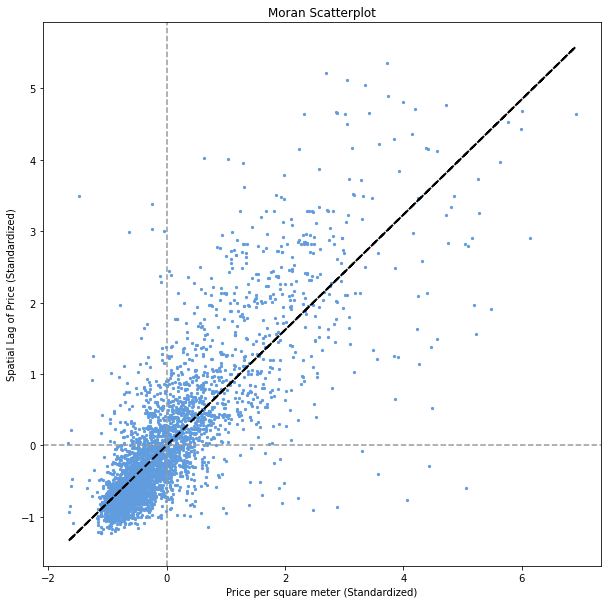

In [35]:
import matplotlib.pyplot as plt

# 计算 Moran's I 和对应的滞后值
lag_price = weights.lag_spatial(w, y)

# 归一化
y_std = (y - y.mean()) / y.std()
lag_price_std = (lag_price - lag_price.mean()) / lag_price.std()

# 计算回归线
slope, intercept = np.polyfit(y_std, lag_price_std, 1)
regression_line = slope * y_std + intercept

# 创建散点图
plt.figure(figsize=(10,10))
plt.scatter(y_std, lag_price_std, color='#619CDF', s=5)
plt.plot(y_std, regression_line, color='black', linewidth=2, linestyle='--')  # 添加黑色虚线回归线
plt.title('Moran Scatterplot')
plt.xlabel('Price per square meter (Standardized)')
plt.ylabel('Spatial Lag of Price (Standardized)')

# 添加分区线
plt.axvline(0, color='#939BA2', linestyle='--')
plt.axhline(0, color='#939BA2', linestyle='--')

plt.show()

---

增加每个点到地铁站口的最短距离 "D:\POI data\810_acc\reclass3_add_distanceTounderground.csv"

In [17]:
df = pd.read_csv(r"D:\POI data\810_acc\reclass3_add_distanceTounderground.csv")


df_encoded = pd.get_dummies(df, columns=['property_type','tenure'])

coords = df_encoded[['lon', 'lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','borough','distance_to_center'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :     -0.0000                Number of Variables   :          55
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3682
Pseudo R-squared    :      0.6751
Spatial Pseudo R-squared:  0.5523
Sigma-square ML     :       0.326                Log likelihood        :   -3353.662
S.E of regression   :       0.571                Akaike info criterion :    6817.325
                                                 Schwarz criterion     :    7159.757

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:352: RuntimeWarning: invalid value encountered in sqrt
  se_result = np.sqrt(variance)
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\spreg\diagnostics.py:167: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(variance)


In [19]:



variable_list = ['Constant',
 'bedrooms',
 'bathrooms',
 'size_square_meters',
 'garden',
 'AccommodationAccess15m',
 'AirportsAccess15m',
 'Eating and drinkingAccess15m',
 'ShoppingAccess15m',
 'Commercial servicesAccess15m',
 'EducationAccess15m',
 'HealthAccess15m',
 'Manufacturing and productionAccess15m',
 'Bodies of waterAccess15m',
 'Bus stopAccess15m',
 'CultureAccess15m',
 'EntertainmentAccess15m',
 'GamblingAccess15m',
 'Green parkAccess15m',
 'Public infrastructureAccess15m',
 'Railway stationsAccess15m',
 'SportsAccess15m',
 'TourismAccess15m',
 'Underground entranceAccess15m','distance_to_underground_entrance',]

# 填充数组
coefficient_list = [-0.0020295, -0.0801145, 0.1414909, 0.0398795, 0.0234173, 0.0354747, -0.0017088, -0.0270345,
                    0.2091408, 0.0794158, 0.0151405, -0.0191503, -0.0831544, -0.0224690, -0.0434609, 0.0502577,
                    -0.2131154, -0.1140259, 0.0057297, 0.0005030, -0.0078094, 0.0785353, 0.1854147, -0.0354245,
                    -0.0522362]

std_error_list = [0.0093471, 0.0181168, 0.0154570, 0.0155800, 0.0123314, 0.0177694, 0.0096321, 0.0693528,
                  0.0296372, 0.0661618, 0.0438827, 0.0215757, 0.0365221, 0.0106630, 0.0313901, 0.0263289,
                  0.0359451, 0.0247913, 0.0145394, 0.0667323, 0.0138888, 0.0237414, 0.0378322, 0.0293926,
                  0.0109321]

z_statistic_list = [-0.2171252, -4.4221027, 9.1538466, 2.5596660, 1.8990019, 1.9963991, -0.1774013, -0.3898114,
                    7.0567077, 1.2003274, 0.3450216, -0.8875866, -2.2768239, -2.1071966, -1.3845431, 1.9088391,
                    -5.9289137, -4.5994367, 0.3940796, 0.0075379, -0.5622818, 3.3079462, 4.9009755, -1.2052181,
                    -4.7782610]

probability_list = [0.8281108, 0.0000098, 0.0000000, 0.0104773, 0.0575642, 0.0458905, 0.8591932, 0.6966760,
                    0.0000000, 0.2300122, 0.7300781, 0.3747632, 0.0227967, 0.0351005, 0.1661922, 0.0562828,
                    0.0000000, 0.0000042, 0.6935223, 0.9939857, 0.5739240, 0.0009398, 0.0000010, 0.2281191,
                    0.0000018]


data = {
    'Variable': variable_list,
    'Coefficient': coefficient_list,
    'Std.Error': std_error_list,
    'z-Statistic': z_statistic_list,
    'Probability': probability_list
}

summary_df = pd.DataFrame(data)
summary_df


,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.0020295000,0.0093471000,-0.2171252000,0.8281108000
1,bedrooms,-0.0801145000,0.0181168000,-4.4221027000,0.0000098000
2,bathrooms,0.1414909000,0.0154570000,9.1538466000,0.0000000000
3,size_square_meters,0.0398795000,0.0155800000,2.5596660000,0.0104773000
4,garden,0.0234173000,0.0123314000,1.8990019000,0.0575642000
5,AccommodationAccess15m,0.0354747000,0.0177694000,1.9963991000,0.0458905000
6,AirportsAccess15m,-0.0017088000,0.0096321000,-0.1774013000,0.8591932000
7,Eating and drinkingAccess15m,-0.0270345000,0.0693528000,-0.3898114000,0.6966760000
8,ShoppingAccess15m,0.2091408000,0.0296372000,7.0567077000,0.0000000000
9,Commercial servicesAccess15m,0.0794158000,0.0661618000,1.2003274000,0.2300122000


In [20]:

df_sig = summary_df[summary_df['Probability'] < 0.05]
df_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
1,bedrooms,-0.0801145000,0.0181168000,-4.4221027000,0.0000098000
2,bathrooms,0.1414909000,0.0154570000,9.1538466000,0.0000000000
3,size_square_meters,0.0398795000,0.0155800000,2.5596660000,0.0104773000
5,AccommodationAccess15m,0.0354747000,0.0177694000,1.9963991000,0.0458905000
8,ShoppingAccess15m,0.2091408000,0.0296372000,7.0567077000,0.0000000000
12,Manufacturing and productionAccess15m,-0.0831544000,0.0365221000,-2.2768239000,0.0227967000
13,Bodies of waterAccess15m,-0.0224690000,0.0106630000,-2.1071966000,0.0351005000
16,EntertainmentAccess15m,-0.2131154000,0.0359451000,-5.9289137000,0.0000000000
17,GamblingAccess15m,-0.1140259000,0.0247913000,-4.5994367000,0.0000042000
21,SportsAccess15m,0.0785353000,0.0237414000,3.3079462000,0.0009398000


In [21]:

df_not_sig = summary_df[summary_df['Probability'] >= 0.05]
df_not_sig

,Variable,Coefficient,Std.Error,z-Statistic,Probability
0,Constant,-0.0020295000,0.0093471000,-0.2171252000,0.8281108000
4,garden,0.0234173000,0.0123314000,1.8990019000,0.0575642000
6,AirportsAccess15m,-0.0017088000,0.0096321000,-0.1774013000,0.8591932000
7,Eating and drinkingAccess15m,-0.0270345000,0.0693528000,-0.3898114000,0.6966760000
9,Commercial servicesAccess15m,0.0794158000,0.0661618000,1.2003274000,0.2300122000
10,EducationAccess15m,0.0151405000,0.0438827000,0.3450216000,0.7300781000
11,HealthAccess15m,-0.0191503000,0.0215757000,-0.8875866000,0.3747632000
14,Bus stopAccess15m,-0.0434609000,0.0313901000,-1.3845431000,0.1661922000
15,CultureAccess15m,0.0502577000,0.0263289000,1.9088391000,0.0562828000
18,Green parkAccess15m,0.0057297000,0.0145394000,0.3940796000,0.6935223000
